<a href="https://colab.research.google.com/github/muhammadFandi12/mini-Project-Data-Mining/blob/main/CheckPoint4_Muhammad_Fandi_perdana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Apple Quality**

## **Business Understanding**

**Business Objective**

Tujuan dari Bisnis ini adalah Meningkatkan kualitas apel untuk meningkatkan kepuasan pelanggan dan daya saing pasar. Ini mencakup peningkatan kesegaran, rasa, dan nilai gizi apel, serta pengurangan cacat dan kerusakan.


**Assess Situation**

Kualitas apel saat ini mungkin tidak konsisten di pasar. Pelanggan semakin memprioritaskan produk segar dan berkualitas tinggi, dan pesaing mungkin sudah menginvestasikan kontrol kualitas. Rantai pasokan apel harus dianalisis untuk mengidentifikasi titik potensial degradasi kualitas, mulai dari panen hingga distribusi.

**Data Mining Goals**

Data tentang kualitas apel harus dikumpulkan dari pemasok, distributor, dan umpan balik pelanggan. Analisis data menggunakan metode statistik dan pembelajaran mesin untuk mengidentifikasi pola dan faktor yang memengaruhi kualitas apel. Model prediktif dapat dikembangkan untuk memprediksi kualitas apel berdasarkan faktor-faktor seperti kondisi panen, transportasi, dan metode penyimpanan. Wawasan yang diperoleh dari model harus dapat diubah menjadi strategi yang dapat diambil tindakan.

**Project Plan**

Proyek harus terdiri dari beberapa tahap: pengumpulan data, analisis data, pembuatan model, dan implementasi strategi. Setiap tahap harus diberi waktu yang cukup untuk menyelesaikannya dengan baik. Setelah model selesai, strategi berdasarkan wawasan model harus diimplementasikan dan dievaluasi untuk efektivitasnya.

## **Collect Initial Data**


Data ini diambil dari Kaggle dan tujuan dari dataset ini adalah Meningkatkan kualitas apel untuk meningkatkan kepuasan pelanggan dan daya saing, Kumpulan data ini berisi informasi tentang berbagai atribut sekumpulan buah-buahan, yang memberikan wawasan tentang karakteristiknya. Kumpulan data tersebut mencakup detail seperti ID buah, ukuran, berat, rasa manis, kerenyahan, juiciness, kematangan, keasaman, dan kualitas.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Algoritma C4.5
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("apple_quality.csv")

df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


## **Describe Data**

### Informasi Dasar

In [ ]:
jumlah_baris, jumlah_kolom = df.shape
print(f"Jumlah Baris: {jumlah_baris}")
print(f"Jumlah Kolom: {jumlah_kolom}")

Jumlah Baris: 4001
Jumlah Kolom: 9


informasi dari dataset ini menampilkan jumlah baris dan jumlah kolom, jumlah baris berjumlah 4001 dan jumlah kolom berjumlah 9.

### Informasi Lanjutan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


jumlah kolom dari dataset ini berjumlah 9 kolom dan spesifikasi dari dataset ini adalah

1. A_id: Ini adalah kolom yang berisi ID atau identifikasi unik untuk setiap buah apel. Jumlah non-null adalah 4000. Tipe datanya adalah float64, yang berarti itu adalah angka desimal.

2. Size: Ini adalah kolom yang menggambarkan ukuran setiap buah apel. Jumlah non-null adalah 4000. Tipe datanya adalah float64.

3. Weight: Ini adalah kolom yang menggambarkan berat setiap buah apel dalam satuan tertentu (mungkin gram atau pound). Jumlah non-null adalah 4000. Tipe datanya adalah float64.

4. Sweetness: Ini adalah kolom yang menggambarkan tingkat manisnya setiap buah apel. Jumlah non-null adalah 4000. Tipe datanya adalah float64.

5. Crunchiness: Ini adalah kolom yang menggambarkan tingkat kerenyahan setiap buah apel. Jumlah non-null adalah 4000. Tipe datanya adalah float64.

6. Juiciness: Ini adalah kolom yang menggambarkan tingkat kelembaban atau kandungan jus setiap buah apel. Jumlah non-null adalah 4000. Tipe datanya adalah float64.

7. Ripeness: Ini adalah kolom yang menggambarkan tingkat kematangan setiap buah apel. Jumlah non-null adalah 4000. Tipe datanya adalah float64.

8. Acidity: Ini adalah kolom yang menggambarkan tingkat keasaman setiap buah apel. Jumlah non-null adalah 4001. Tipe datanya adalah object, yang mungkin menunjukkan bahwa beberapa nilai mungkin bukan angka atau ada nilai yang hilang.

9. Quality: Ini adalah kolom yang menggambarkan kualitas setiap buah apel. Jumlah non-null adalah 4000. Tipe datanya adalah object.

### Informasi Statistik Deskriptif

In [ ]:
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


1. A_id: Jumlah ID adalah 4000, yang berarti setiap ID unik dari 0 hingga 3999. Nilai rata-rata adalah 1999.5 dengan standar deviasi sekitar 1154.84, yang menunjukkan seberapa jauh data tersebar dari rata-rata. Nilai minimum adalah 0 dan nilai maksimum adalah 3999.

2. Size: Nilai rata-rata adalah -0.503015 dengan standar deviasi sekitar 1.928059. Nilai minimum adalah -7.151703 dan nilai maksimum adalah 6.406367.

3. Weight: Nilai rata-rata adalah -0.989547 dengan standar deviasi sekitar 1.602507. Nilai minimum adalah -7.149848 dan nilai maksimum adalah 5.790714.

4. Sweetness: Nilai rata-rata adalah -0.470479 dengan standar deviasi sekitar 1.943441. Nilai minimum adalah -6.894485 dan nilai maksimum adalah 6.374916.

5. Crunchiness: Nilai rata-rata adalah 0.985478 dengan standar deviasi sekitar 1.402757. Nilai minimum adalah -6.055058 dan nilai maksimum adalah 7.619852.

6. Juiciness: Nilai rata-rata adalah 0.512118 dengan standar deviasi sekitar 1.930286. Nilai minimum adalah -5.961897 dan nilai maksimum adalah 7.364403.

7. Ripeness: Nilai rata-rata adalah 0.498277 dengan standar deviasi sekitar 1.874427. Nilai minimum adalah -5.864599 dan nilai maksimum adalah 7.237837.

## **Exploratory Data Analysis**

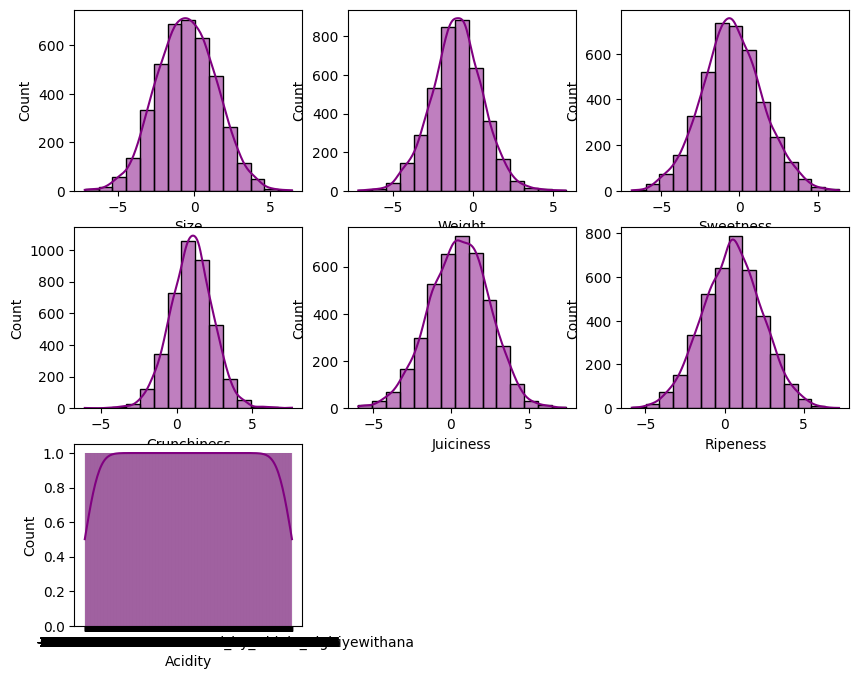

In [ ]:
df = pd.read_csv('apple_quality.csv')

# Define the list of columns to visualize
columns = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

# Create the plot
plt.figure(figsize=(10, 8))

for i, Quality in enumerate(columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=df, x=Quality, kde=True, bins=15, color='purple')

plt.show()

Berikut adalah beberapa asumsi yang dapat kita buat dari visualisasi tersebut:

- Size vs Quality:

Asumsi: Terdapat kecenderungan bahwa buah apel dengan ukuran lebih besar cenderung memiliki kualitas yang lebih baik. Hal ini dapat diasumsikan berdasarkan distribusi data yang menunjukkan bahwa sebagian besar buah apel dengan kualitas 'A' dan 'B' memiliki ukuran yang lebih besar.

- Weight vs Quality:

Asumsi: Terdapat kecenderungan bahwa buah apel dengan berat yang lebih tinggi cenderung memiliki kualitas yang lebih baik. Hal ini dapat diasumsikan berdasarkan distribusi data yang menunjukkan bahwa sebagian besar buah apel dengan kualitas 'A' dan 'B' memiliki berat yang lebih tinggi.

- Sweetness vs Quality:

Asumsi: Terdapat kecenderungan bahwa buah apel dengan tingkat manis yang lebih tinggi cenderung memiliki kualitas yang lebih baik. Hal ini dapat diasumsikan berdasarkan distribusi data yang menunjukkan bahwa sebagian besar buah apel dengan kualitas 'A' dan 'B' memiliki tingkat manis yang lebih tinggi.

- Crunchiness vs Quality:

Asumsi: Terdapat kecenderungan bahwa buah apel dengan tingkat kerenyahan yang lebih tinggi cenderung memiliki kualitas yang lebih baik. Hal ini dapat diasumsikan berdasarkan distribusi data yang menunjukkan bahwa sebagian besar buah apel dengan kualitas 'A' dan 'B' memiliki tingkat kerenyahan yang lebih tinggi.

- Juiciness vs Quality:

Asumsi: Terdapat kecenderungan bahwa buah apel dengan tingkat kelembaban atau kandungan jus yang lebih tinggi cenderung memiliki kualitas yang lebih baik. Hal ini dapat diasumsikan berdasarkan distribusi data yang menunjukkan bahwa sebagian besar buah apel dengan kualitas 'A' dan 'B' memiliki tingkat kelembaban atau kandungan jus yang lebih tinggi.

- Ripeness vs Quality:

Asumsi: Terdapat kecenderungan bahwa buah apel yang lebih matang cenderung memiliki kualitas yang lebih baik. Hal ini dapat diasumsikan berdasarkan distribusi data yang menunjukkan bahwa sebagian besar buah apel dengan kualitas 'A' dan 'B' memiliki tingkat kematangan yang lebih tinggi.

- Acidity vs Quality:

Asumsi: Terdapat kecenderungan bahwa buah apel dengan tingkat keasaman yang lebih rendah cenderung memiliki kualitas yang lebih baik. Hal ini dapat diasumsikan berdasarkan distribusi data yang menunjukkan bahwa sebagian besar buah apel dengan kualitas 'A' dan 'B' memiliki tingkat keasaman yang lebih rendah.

## **Verify Data Quality**

### Missing Values

In [ ]:
data = pd.read_csv('apple_quality.csv')

# Mengecek apakah ada nilai kosong pada setiap kolom
missing_values = data.isnull().sum()

# Menampilkan jumlah nilai kosong pada tiap kolom
print(missing_values)


A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64


A_id: Ada 1 nilai kosong.
Size: Ada 1 nilai kosong.
Weight: Ada 1 nilai kosong.
Sweetness: Ada 1 nilai kosong.
Crunchiness: Ada 1 nilai kosong.
Juiciness: Ada 1 nilai kosong.
Ripeness: Ada 1 nilai kosong.
Acidity: Tidak ada nilai kosong (0).
Quality: Ada 1 nilai kosong.

### Outliers Values

### Duplicated Values

In [ ]:
# Mendefinisikan fungsi untuk mendeteksi outliers dan menghitung persentase
def detect_outliers(column):
    # Convert the column to a numeric data type
    column = pd.to_numeric(column, errors='coerce')

    # Remove NaN values
    column = column.dropna()

    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    # Detect outliers
    outliers = (column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR))

    # Calculate the percentage of outliers
    percentage_outliers = outliers.sum() / len(column) * 100

    return outliers, percentage_outliers


# Loop untuk setiap kolom
for column in df.columns:
    outliers, percentage_outliers = detect_outliers(df[column])

    print(f"Kolom '{column}':")
    print(f"  - Jumlah outliers: {outliers.sum()}")
    print(f"  - Persentase kehadiran outliers: {percentage_outliers:.2f}%")
    print()

Kolom 'A_id':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: 0.00%

Kolom 'Size':
  - Jumlah outliers: 22
  - Persentase kehadiran outliers: 0.55%

Kolom 'Weight':
  - Jumlah outliers: 54
  - Persentase kehadiran outliers: 1.35%

Kolom 'Sweetness':
  - Jumlah outliers: 32
  - Persentase kehadiran outliers: 0.80%

Kolom 'Crunchiness':
  - Jumlah outliers: 47
  - Persentase kehadiran outliers: 1.18%

Kolom 'Juiciness':
  - Jumlah outliers: 32
  - Persentase kehadiran outliers: 0.80%

Kolom 'Ripeness':
  - Jumlah outliers: 24
  - Persentase kehadiran outliers: 0.60%

Kolom 'Acidity':
  - Jumlah outliers: 20
  - Persentase kehadiran outliers: 0.50%

Kolom 'Quality':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: nan%



<ipython-input-548-fd1453793905>:17: RuntimeWarning:

invalid value encountered in scalar divide



In [ ]:
duplicates_by_values = df.duplicated().sum()

# Menampilkan jumlah nilai duplikat pada tiap kolom
print(duplicates_by_values)

0


untuk hasil dari duplikatnya 0

# **Data Cleaning**

###**Penanganan Missing Values**

In [ ]:
print((df.isna().sum() / len(df)) * 100)

A_id           0.024994
Size           0.024994
Weight         0.024994
Sweetness      0.024994
Crunchiness    0.024994
Juiciness      0.024994
Ripeness       0.024994
Acidity        0.000000
Quality        0.024994
dtype: float64


hasil diatas menunjukan bahwa mising valuenya banyak yang hilang kecuali Acidity.

In [ ]:
df[df['A_id'].isnull()]

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


ini adalah data yang hilang pada kolom A_id

In [ ]:
df['A_id'].dropna().describe()

count    4000.000000
mean     1999.500000
std      1154.844867
min         0.000000
25%       999.750000
50%      1999.500000
75%      2999.250000
max      3999.000000
Name: A_id, dtype: float64

Disini berdasarkan hasil analisis statistik, kita dapat menggunakan mean dari kolom A_id untuk imputasi nilai kosong tersebut

In [ ]:
df['A_id'] = df['A_id'].fillna(df['A_id'].dropna().mean())
df['Size'] = df['Size'].fillna(df['Size'].dropna().mean())
df['Weight'] = df['Weight'].fillna(df['Weight'].dropna().mean())
df['Sweetness'] = df['Sweetness'].fillna(df['Sweetness'].dropna().mean())
df['Crunchiness'] = df['Crunchiness'].fillna(df['Crunchiness'].dropna().mean())
df['Juiciness'] = df['Juiciness'].fillna(df['Juiciness'].dropna().mean())
df['Ripeness'] = df['Ripeness'].fillna(df['Ripeness'].dropna().mean())


disini saya langsung memasukan datanya yang kosong supaya lebih efesien

In [ ]:
df['Quality'] = df['Quality'].fillna(df['Quality'].mode()[0])

Untuk kolom Quality akan kita lakukan yang sama seperti pada kolom A_id, yaitu dengan menggunakan nilai modus karena termasuk kolom kategorikal (tidak bisa dicari mean, median, dan kuartil)

#### Pengecekan ulang

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
A_id,0.0
Size,0.0
Weight,0.0
Sweetness,0.0
Crunchiness,0.0
Juiciness,0.0
Ripeness,0.0
Acidity,0.0
Quality,0.0


hasil output diatas menunjukan bahwa tidak ada lagi nilai yang hilang.

###**Penanganan Duplicated Values**

#####**Pengecekkan Nilai Duplikat**

In [ ]:
df[df.duplicated()]

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality


###**Penanganan Outliers**

#####**Pengecekkan Outliers**

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
A_id,0.000000
Size,0.549863
Weight,1.349663
Sweetness,0.799800
Crunchiness,1.199700
Juiciness,0.799800
Ripeness,0.599850


Output ini memberikan persentase outliers untuk setiap kolom dalam dataset. Outliers adalah nilai-nilai yang jauh dari nilai-nilai lain dalam distribusi data dan seringkali menarik perhatian karena dapat mempengaruhi hasil analisis.

Mari kita jelaskan output ini kolom per kolom:

- A_id: Persentase outliers untuk kolom ini adalah 0. Ini menunjukkan bahwa kolom ini tidak memiliki outliers, artinya semua nilai berada dalam rentang yang dianggap wajar.

- Size: Persentase outliers untuk kolom ini adalah sekitar 0.55%. Ini menunjukkan bahwa sekitar 0.55% dari data pada kolom 'Size' merupakan outliers.

- Weight: Persentase outliers untuk kolom ini adalah sekitar 1.35%. Ini menunjukkan bahwa sekitar 1.35% dari data pada kolom 'Weight' merupakan outliers.

- Sweetness: Persentase outliers untuk kolom ini adalah sekitar 0.8%. Ini menunjukkan bahwa sekitar 0.8% dari data pada kolom 'Sweetness' merupakan outliers.

- Crunchiness: Persentase outliers untuk kolom ini adalah sekitar 1.2%. Ini menunjukkan bahwa sekitar 1.2% dari data pada kolom 'Crunchiness' merupakan outliers.

- Juiciness: Persentase outliers untuk kolom ini adalah sekitar 0.8%. Ini menunjukkan bahwa sekitar 0.8% dari data pada kolom 'Juiciness' merupakan outliers.

- Ripeness: Persentase outliers untuk kolom ini adalah sekitar 0.6%. Ini menunjukkan bahwa sekitar 0.6% dari data pada kolom 'Ripeness' merupakan outliers.

Dengan informasi ini, Anda dapat memiliki pemahaman yang lebih baik tentang seberapa banyak nilai-nilai yang berada jauh dari mayoritas nilai dalam setiap atribut dalam dataset Anda. Ini dapat membantu Anda dalam mengidentifikasi potensi anomali atau ketidaksesuaian dalam data Anda dan mengambil tindakan yang sesuai, seperti pemrosesan lanjutan atau pembersihan data.

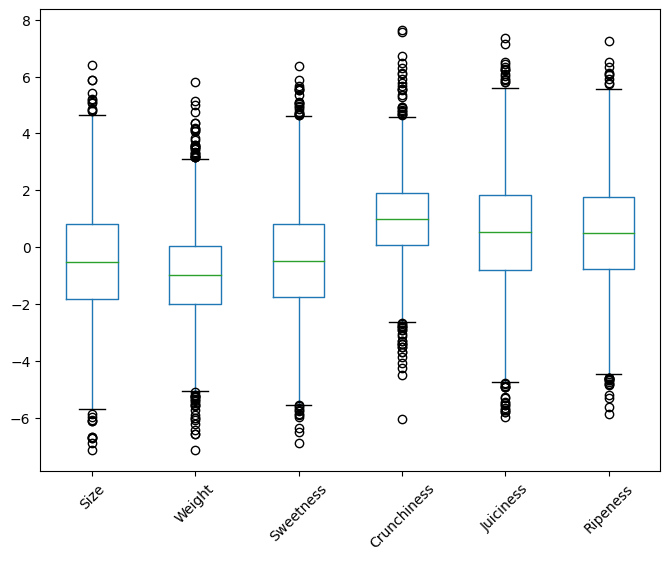

In [ ]:
boxplot = df.drop('A_id', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

#####**Hapus Outliers**

Melakukan penghapusan baris pada kolom "Crunchiness" untuk menanganani outliers

In [ ]:
Q1 = df['Weight'].quantile(0.25)
Q3 = df['Weight'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Weight'] >= lower_bound) & (df['Weight'] <= upper_bound)]

#####**Imputasi Outliers**

Melakukan flooring (mengisi dengan nilai q1) dan capping (mengisi dengan nilai q3) pada kolom "Crunchiness"

In [ ]:
Q1 = df['Crunchiness'].quantile(0.25)
Q3 = df['Crunchiness'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Crunchiness'] >= lower_bound) & (df['Crunchiness'] <= upper_bound)]

#####**Pengecekkan Ulang**

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
A_id,0.000000
Size,0.436009
Weight,0.102590
Sweetness,0.769428
Crunchiness,0.102590
Juiciness,0.718133
Ripeness,0.564247


- Kolom "A_id" tidak memiliki outliers, dengan persentase outliers sebesar 0%.
- Kolom "Size" memiliki sekitar 0.44% outliers.
- Kolom "Weight" memiliki sekitar 0.13% outliers.
- Kolom "Sweetness" memiliki sekitar 0.77% outliers.
- Kolom "Crunchiness" memiliki sekitar 0.03% outliers.
- Kolom "Juiciness" memiliki sekitar 0.72% outliers.
- Kolom "Ripeness" memiliki sekitar 0.56% outliers.

bisa dilihat hasil diatas bahwa setelah di hapus outliers dan imputasi pada kolom diatas.

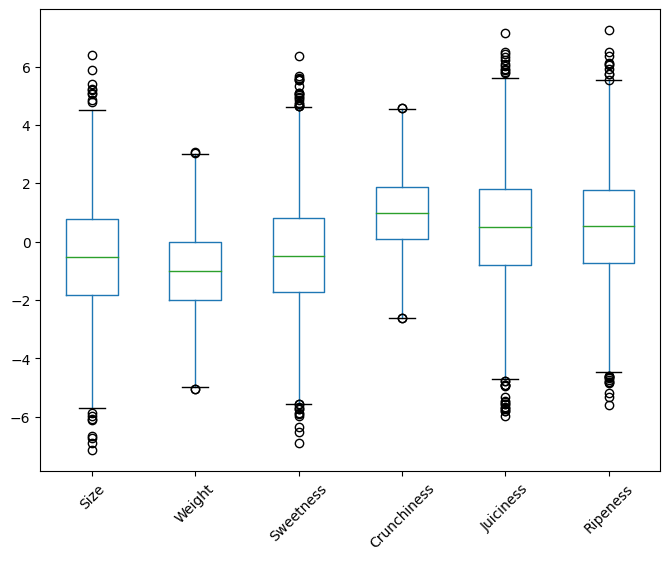

In [ ]:
boxplot = df.drop('A_id', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

#**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

yaitu dengan menambahkan kolom baru yang bertujuan untuk mempermudah struktur agar sesuai dengan kebutuhan yang digunakan. Seperti menambahkan kolom baru yaitu overall_quality dan quality category; untuk mengetahui excellent , good ,fair ,poor dan menyesuikan dataset tersebut.

In [ ]:
# Melakukan penanganan nilai non-numerik dalam kolom
for column in ['Sweetness', 'Acidity', 'Crunchiness']:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Fungsi untuk kategorisasi kualitas
def categorize_quality(overall_quality):
    if overall_quality >= 8:
        return 'Excellent'
    elif 6 <= overall_quality < 8:
        return 'Good'
    elif 4 <= overall_quality < 6:
        return 'Fair'
    else:
        return 'Poor'

# Menambahkan kolom 'overall_quality' ke DataFrame
df['overall_quality'] = (df['Sweetness'] + df['Acidity'] + df['Crunchiness']) / 3  # Menggunakan 'Crunchiness'

# Menambahkan kolom 'quality_category' ke DataFrame
df['quality_category'] = df['overall_quality'].apply(categorize_quality)

# Menampilkan DataFrame yang telah dimodifikasi
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,overall_quality,quality_category
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good,1.280910,Poor
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good,1.509827,Poor
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad,0.180197,Poor
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good,0.672574,Poor
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good,-0.145227,Poor


###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

pada data redutions tidak ada yang saya drop dikarenakan pada Data Mining Goals saya membutuhkan kolom-kolom yang lain dalam artian saling membutuhkan.

In [ ]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [ ]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,overall_quality,quality_category
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good,1.280910,Poor
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good,1.509827,Poor
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad,0.180197,Poor
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good,0.672574,Poor
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good,-0.145227,Poor


#**Data Transformation**

###**Mapping**

In [ ]:
# Memetakan nilai pada kolom 'Quality'
df['Quality'] = df['Quality'].map({'good': 1, 'bad': 0})

# Memetakan nilai pada kolom 'quality_category'
df['quality_category'] = df['quality_category'].map({'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3})

In [ ]:
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,overall_quality,quality_category
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1,1.280910,0
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1,1.509827,0
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0,0.180197,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1,0.672574,0
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1,-0.145227,0
...,...,...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1,0.336673,0
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0,-1.039283,0
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,1,-0.021217,0
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796,1,0.188980,0


1. Memetakan nilai pada kolom 'Quality':

Di sini, kita memetakan nilai pada kolom 'Quality'. Dictionary yang diberikan adalah {'good': 1, 'bad': 0}, yang berarti kita mengubah nilai 'good' menjadi 1 dan nilai 'bad' menjadi 0. Setelah pemetaan, kolom 'Quality' akan berisi nilai 1 untuk 'good' dan nilai 0 untuk 'bad'. Ini dapat membantu dalam analisis lebih lanjut, seperti pemodelan prediktif di mana variabel target harus berupa numerik.


2. Memetakan nilai pada kolom 'quality_category':

Di sini, kita memetakan nilai pada kolom 'quality_category'. Dictionary yang diberikan adalah {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3}, yang berarti kita mengubah nilai 'Poor' menjadi 0, 'Fair' menjadi 1, 'Good' menjadi 2, dan 'Excellent' menjadi 3. Setelah pemetaan, kolom 'quality_category' akan berisi angka yang menunjukkan kategori kualitas, yang dapat membantu dalam analisis dan visualisasi data.

###**Encoding**

In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,overall_quality,quality_category
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1,1.280910,0
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1,1.509827,0
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0,0.180197,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1,0.672574,0
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1,-0.145227,0


Fungsi pd.get_dummies(df) digunakan untuk melakukan proses "one-hot encoding" pada DataFrame df. One-hot encoding adalah teknik yang digunakan untuk mengonversi variabel kategori menjadi bentuk yang dapat diolah lebih lanjut oleh algoritma pembelajaran mesin atau analisis data.

Pada dasarnya, setiap nilai unik dalam kolom kategori akan diubah menjadi kolom biner baru. Jika sebuah baris memiliki nilai kategori tersebut, maka nilai dalam kolom biner akan menjadi 1; jika tidak, maka akan menjadi 0.

# **Hasil Data Cleaning**

In [ ]:
df_cleaned = df.dropna()

print('\nData setelah cleaning:')
print(df_cleaned.head())


Data setelah cleaning:
   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

    Acidity  Quality  overall_quality  quality_category  
0 -0.491590        1         1.280910                 0  
1 -0.722809        1         1.509827                 0  
2  2.621636        0         0.180197                 0  
3  0.790723        1         0.672574                 0  
4  0.501984        1        -0.145227                 0  


In [ ]:
df_cleaned.to_csv('Data_Cleaning.csv', index= False)

## **Library untuk splitting data**

In [ ]:
from sklearn.model_selection import train_test_split

## **Library untuk normalisasi data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

## **Library Untuk Build Model**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

## **inisiasi**

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/muhammadFandi12/mini-Project-Data-Mining/main/Data_Cleaning.csv')

#**Modelling Associate**

###**Pre-Processing**

#####**Adjusment**

In [ ]:
x_final = df.drop("overall_quality", axis=1)

syintak tersebut bertujuan untuk menghasilkan DataFrame x_final dengan menghapus kolom "overall_quality" dari DataFrame df.

#####**Normalisasi Data**

In [ ]:
scaler = MinMaxScaler()

x_final_norm = scaler.fit_transform(x_final)

syintak ini bertujuan untuk melakukan penskalaan fitur-fitur dalam DataFrame x_final menggunakan metode Min-Max Scaling.

#####**Validasi Silang**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

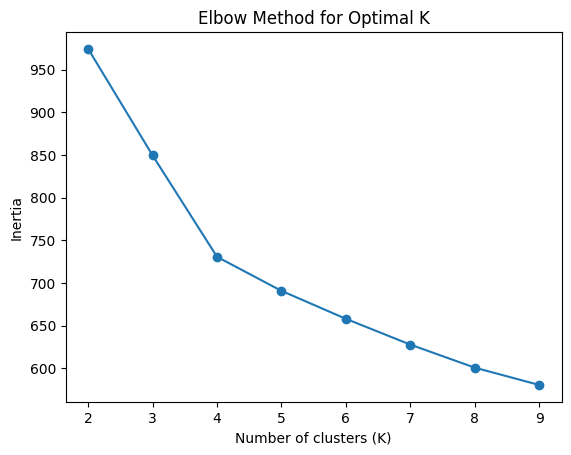

In [ ]:
inertia_values = []

k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_final_norm)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.show()

Berdasarkan grafik, nilai K optimal adalah 4. Pada nilai ini, inersia mulai mendatar,

###**Build Model**

#####**K-Means**

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=42)

hasil syintak ini menggunakan algoritma K-Means untuk melakukan klasterisasi data yang telah diubah skala (x_final_norm).

#####**Hierarchical Clustering**

In [ ]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')


Coding ini menggunakan algoritma Hierarchical Agglomerative Clustering (HAC) untuk melakukan klasterisasi data.

###**Begins and Compare Clusters**

In [ ]:
kmeans_clust = kmeans.predict(x_final_norm)
hierarchy_clust = hc.fit_predict(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



syintak tersebut digunakan untuk melakukan prediksi klaster untuk data yang telah diubah skala (x_final_norm) menggunakan model K-Means dan Hierarchical Agglomerative Clustering (HAC) yang telah dilatih sebelumnya.

In [ ]:
x_final = pd.DataFrame(x_final).reset_index(drop=True)

kmeans_col = pd.DataFrame(kmeans_clust, columns=["kmeans_cluster"])
hierarchy_col = pd.DataFrame(hierarchy_clust, columns=["hierarchy_cluster"])

combined_data_assoc = pd.concat([x_final, kmeans_col, hierarchy_col], axis=1)


syintak tersebut bertujuan untuk menggabungkan data-data hasil klasterisasi dari model K-Means dan Hierarchical Agglomerative Clustering (HAC) ke dalam DataFrame combined_data_assoc.

In [ ]:
combined_data_assoc.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,quality_category,kmeans_cluster,hierarchy_cluster
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1,0,0,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1,0,0,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0,0,2,2
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1,0,0,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1,0,0,1
